## One Drive Downloader Test/Data Exploration

This notebook explores our dataset. We use `onedrivedownloader` package to download shared OneDrive files and then tests using `nibabel` to display the NIfTI files (`xxx.ni.gz`)

## 1. Installation and imports

In [50]:
import os

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# working_dir = '/content/drive/My Drive/Capstone/BioCV_Su23/src'
working_dir = '/content/drive/MyDrive/capstone/BioCV_Su23/src'

os.chdir(working_dir)

Mounted at /content/drive


In [51]:
!pip install onedrivedownloader nibabel

In [52]:
import matplotlib.pyplot as plt
import numpy as np

#******** TODO: DELETE this part when modules are finalized *********#
# Re-run this section to force reload of modules when they're being updated on the fly
import importlib
import utils.mri_common as mri_common
import utils.data_handler as dh
import utils.mri_plotter as mriplt

importlib.reload(mri_common)
importlib.reload(dh)
importlib.reload(mriplt)
#******************************************************************#
# Custom modules
import utils.mri_common as mri_common
from utils.data_handler import DataHandler, StructuralScan, MriType
from utils.mri_plotter import MRIPlotter

data_handler = DataHandler()

## 2. Download images

In [4]:
# Download segmentation
segm_files = data_handler.list_mri_in_dir(mri_type=MriType.ANNOTATED)
auto_segm_files = data_handler.list_mri_in_dir(mri_type=MriType.AUTO_SEGMENTED)

print("")
print(f"Number of manually-revised images: {len(segm_files)}")
print(f"Number of auto-segmented images: {len(auto_segm_files)}")


100%|██████████| 2.63M/2.63M [00:00<00:00, 22.4MiB/s]


Unzipping file...


Extracting files: 100%|██████████| 147/147 [00:00<00:00, 1496.90it/s]


mri directory /content/data/images_segm


100%|██████████| 10.3M/10.3M [00:00<00:00, 38.3MiB/s]


Unzipping file...


Extracting files: 100%|██████████| 611/611 [00:00<00:00, 1640.40it/s]

mri directory /content/data/automated_segm

Number of manually-revised images: 147
Number of auto-segmented images: 611


In [5]:
# Note that the succeeding files pre-processed files that we saved in our shared OneDrive
# and the steps taken to generate these files are in 01_mri_data_prep_and_loading.ipynb

# The intent of the succeeding tests is visualize these files
# and test that downloading the onedrive links work.

# Download and list reduced files
auto_segm_reduced_files =  data_handler.list_mri_in_dir(mri_type=MriType.AUTO_SEGMENTED_REDUCED)
segm_reduced_files =  data_handler.list_mri_in_dir(mri_type=MriType.ANNOTATED_REDUCED)
struct_reduced_files = data_handler.list_mri_in_dir(mri_type=MriType.STRUCT_SCAN_REDUCED)

print("")
print(f"Number of reduced auto-segmented images: {len(auto_segm_reduced_files)}")

# segm_reduced_files and struct_reduced_files should have the same length since they reside in the same folder
print(f"Number of reduced manually-revised images: {len(segm_reduced_files)}")
print(f"Number of reduced structural images: {len(struct_reduced_files)}")

100%|██████████| 1.86M/1.86M [00:00<00:00, 19.0MiB/s]


Unzipping file...


Extracting files: 100%|██████████| 148/148 [00:00<00:00, 1181.97it/s]


mri directory /content/data/automated_segm_reduced


100%|██████████| 1.46G/1.46G [00:35<00:00, 40.8MiB/s]


Unzipping file...


Extracting files: 100%|██████████| 735/735 [00:14<00:00, 50.10it/s]

mri directory /content/data/images_annot_reduced
mri directory /content/data/images_annot_reduced

Number of reduced auto-segmented images: 147
Number of reduced manually-revised images: 735
Number of reduced structural images: 735


In [6]:
# Download struct files
struct_files = data_handler.list_mri_in_dir(mri_type=MriType.STRUCT_SCAN)

100%|██████████| 5.85G/5.85G [01:47<00:00, 54.6MiB/s]


Unzipping file...


Extracting files: 100%|██████████| 3355/3355 [01:42<00:00, 32.86it/s]

mri directory /content/data/images_structural


In [32]:
print(f"Number of structural images: {len(struct_files)}")
# get unique struct files:
unique_struct = list(set([struct_file.split("_")[0] for struct_file in struct_files]))

# confirm that we can map between segmentation labels and structural images
# collect every segm file name in segm_files if it is in struct files and
# compare the length of the resulting list with the length of segm_files
# expect true

print("confirmed that each segmented file has a struct file")
print((len([img for img in segm_files if img.split("_")[0] in unique_struct])
 == len(segm_files)))

Number of structural images: 2684
confirmed that each segmented file has a struct file
True


## 3. Preliminary visualization tests

### 3.a Plot sample GBM dataset

In [53]:
mri_plt = MRIPlotter()

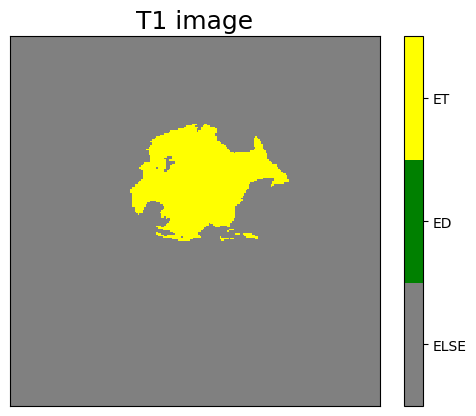

In [34]:
fig, axs = plt.subplots()
annotated_img = data_handler.load_mri(subj_id="UPENN-GBM-00002",
                                mri_type=MriType.ANNOTATED)

mri_plt.plot_segm_img(img_data=annotated_img, fig=fig, axs=axs, row=0, col=1, title="T1 image")

plt.show()

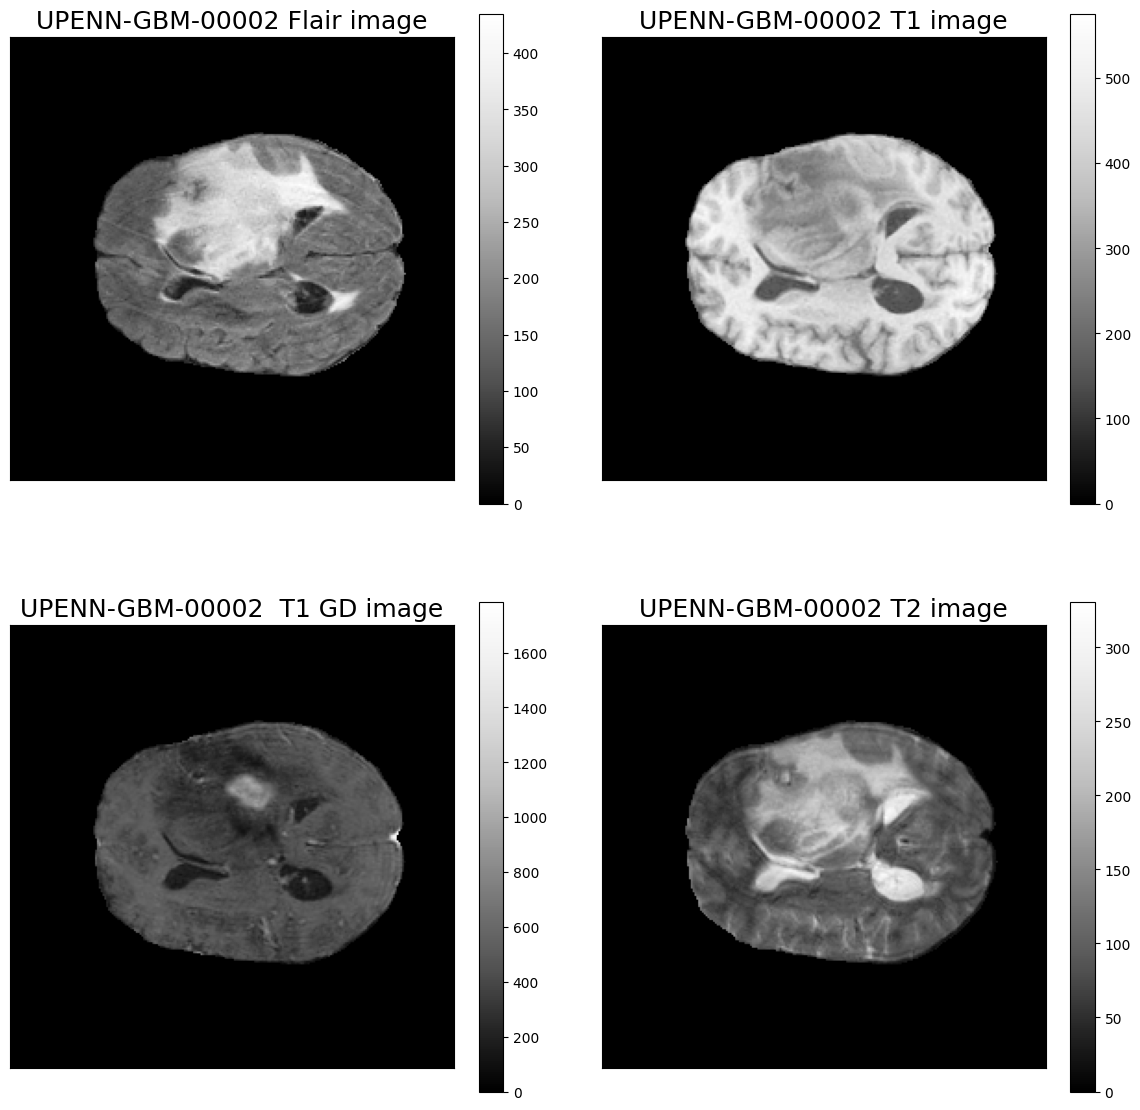

In [36]:
# TEST: Plot 2 row and 2 cols
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 14))
test_subj_id = "UPENN-GBM-00002"
flair_img = data_handler.load_mri(subj_id=test_subj_id,
                                mri_type=MriType.STRUCT_SCAN,
                                struct_scan=StructuralScan.FLAIR)
t1_img = data_handler.load_mri(subj_id=test_subj_id,
                                mri_type=MriType.STRUCT_SCAN,
                                struct_scan=StructuralScan.T1)
t1gd_img = data_handler.load_mri(subj_id=test_subj_id,
                                mri_type=MriType.STRUCT_SCAN,
                                struct_scan=StructuralScan.T1GD)
t2_img = data_handler.load_mri(subj_id=test_subj_id,
                                mri_type=MriType.STRUCT_SCAN,
                                struct_scan=StructuralScan.T2)

mri_plt.plot_struct_img(img_data=flair_img, fig=fig, axs=axs, row=0, col=0,
                        title=f"{test_subj_id} Flair image")

mri_plt.plot_struct_img(img_data=t1_img, fig=fig, axs=axs, row=0, col=1,
                        title=f"{test_subj_id} T1 image")

mri_plt.plot_struct_img(img_data=t1gd_img, fig=fig, axs=axs, row=1, col=0,
                        title=f"{test_subj_id}  T1 GD image")

mri_plt.plot_struct_img(img_data=t2_img, fig=fig, axs=axs, row=1, col=1,
                        title=f"{test_subj_id} T2 image")


plt.show()

### 3.b. Plot the structural and segmented images and their corresponding reduced versions

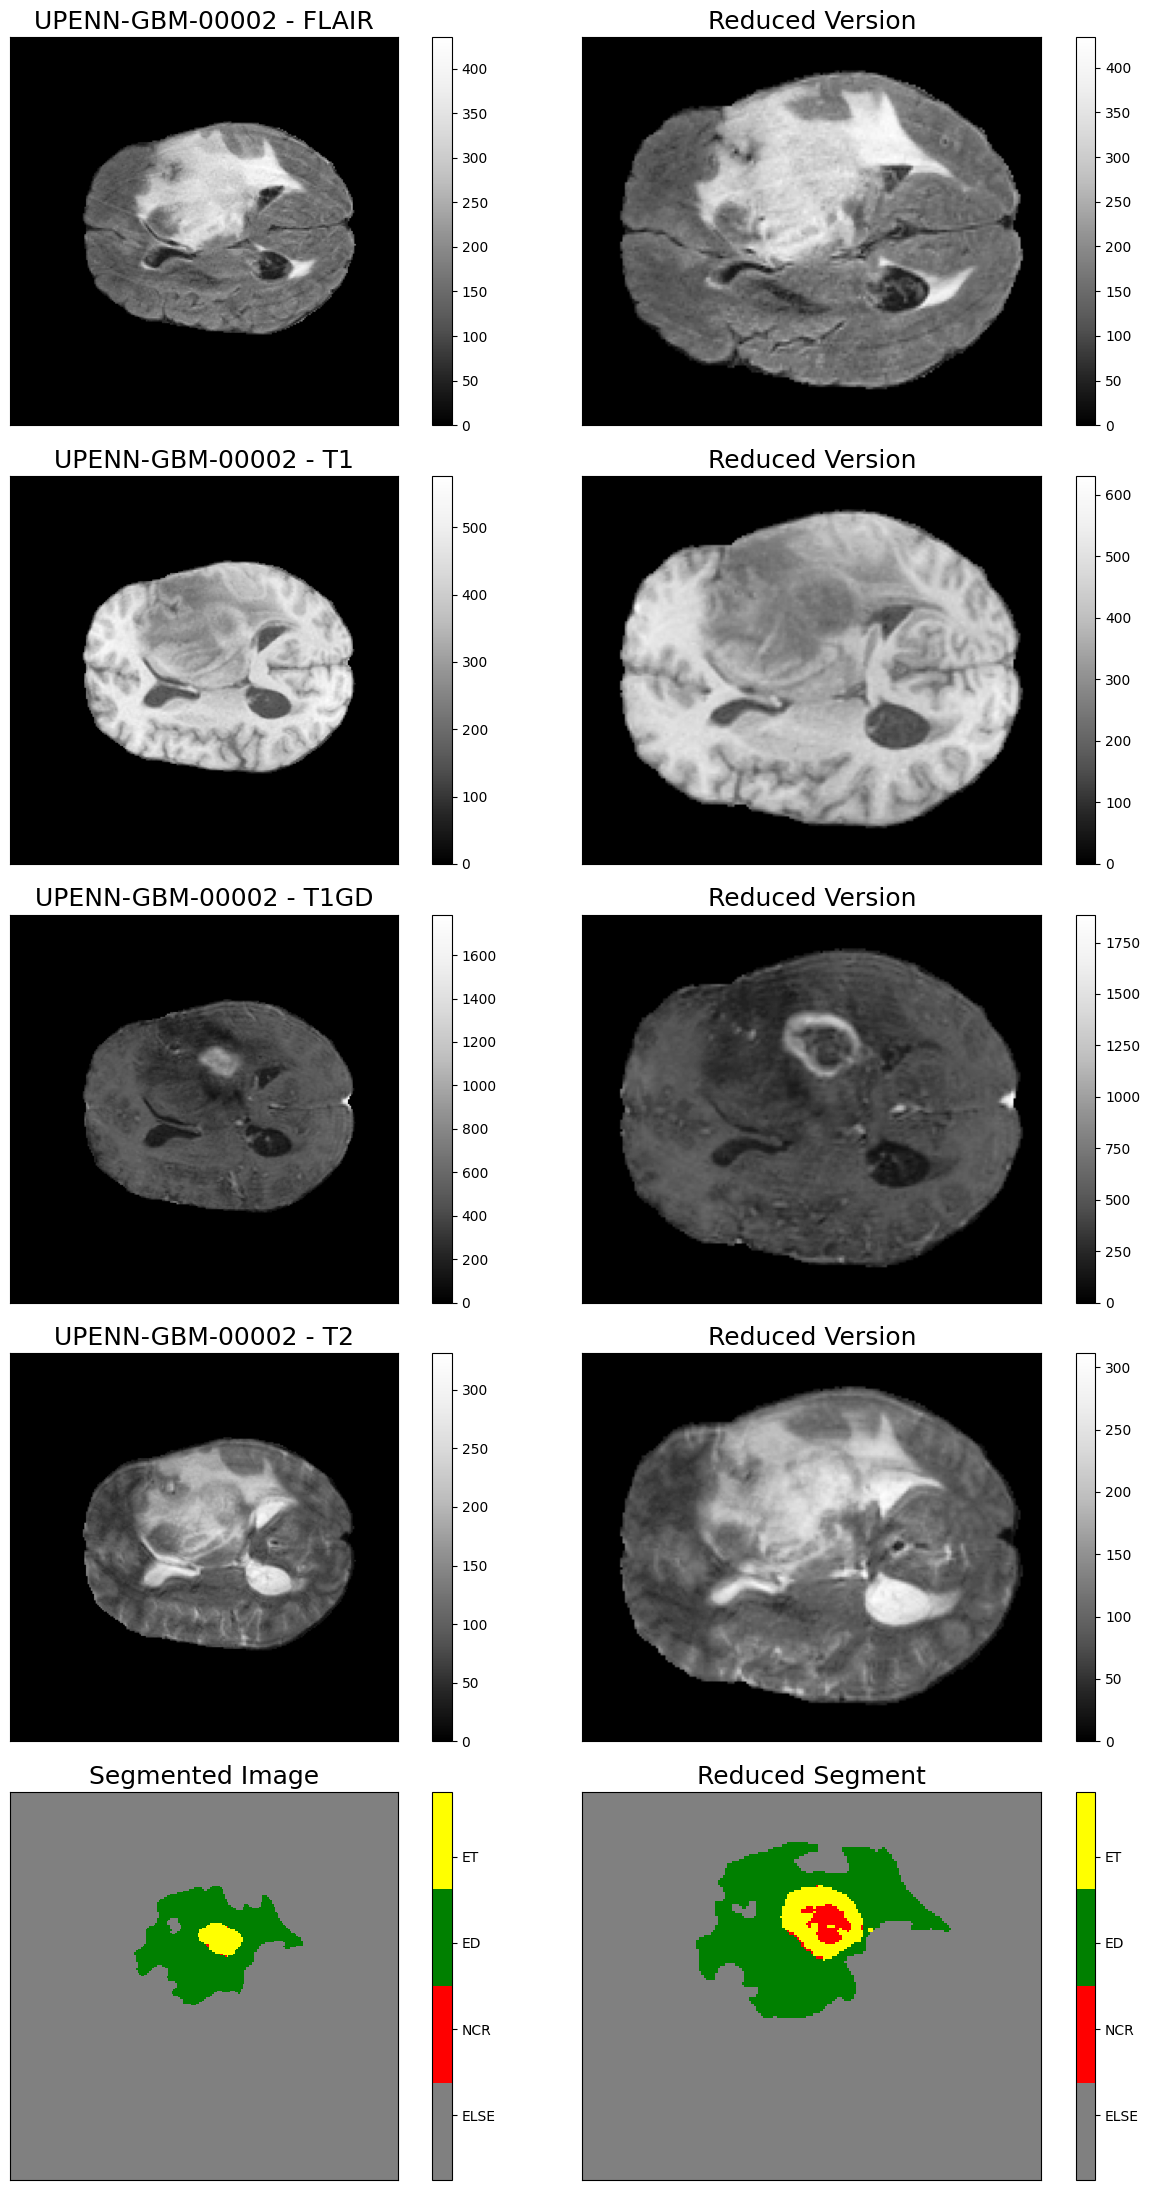

In [54]:
subj_file = segm_files[0].split("_")[0]

# plot struct and corresponding reduced images
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(14, 22))

# plot each structural scan image
for row, struct_scan in enumerate(StructuralScan):

    # load and plot structural images on the first column
    struct_img = data_handler.load_mri(subj_id=subj_file,
                                mri_type=MriType.STRUCT_SCAN,
                                struct_scan=struct_scan)

    mri_plt.plot_struct_img(img_data=struct_img, fig=fig, axs=axs, row=row, col=0, title=f"{subj_file} - {struct_scan}")

    # load and plot corresponding reduced images on the second column
    reduced_img = data_handler.load_mri(subj_id=subj_file,
                                mri_type=MriType.STRUCT_SCAN_REDUCED,
                                struct_scan=struct_scan)

    mri_plt.plot_struct_img(img_data=reduced_img, fig=fig, axs=axs, row=row, col=1, title="Reduced Version")

# finally, add the segmentation label at the last row
# a. plot the segmented image
segm_img = data_handler.load_mri(subj_id=subj_file,
                                mri_type=MriType.AUTO_SEGMENTED)
mri_plt.plot_segm_img(img_data=segm_img, fig=fig, axs=axs, row=4, col=0, title="Segmented Image")

# b. plot the reduced version of the segmented image
reduced_segm_img = data_handler.load_mri(subj_id=subj_file,
                                mri_type=MriType.AUTO_SEGMENTED_REDUCED)
mri_plt.plot_segm_img(img_data=reduced_segm_img, fig=fig, axs=axs, row=4, col=1,
                      title="Reduced Segment")

# show the figure
plt.tight_layout()
plt.show()

In [38]:
# Check labels
print("segmentation labels", np.unique(segm_img))
print("reduced segmentation labels",  np.unique(reduced_segm_img))

segmentation labels [0 1 2 4]
reduced segmentation labels [0 1 2 4]


### 3.c. Plot the segments as overlay to the structural images

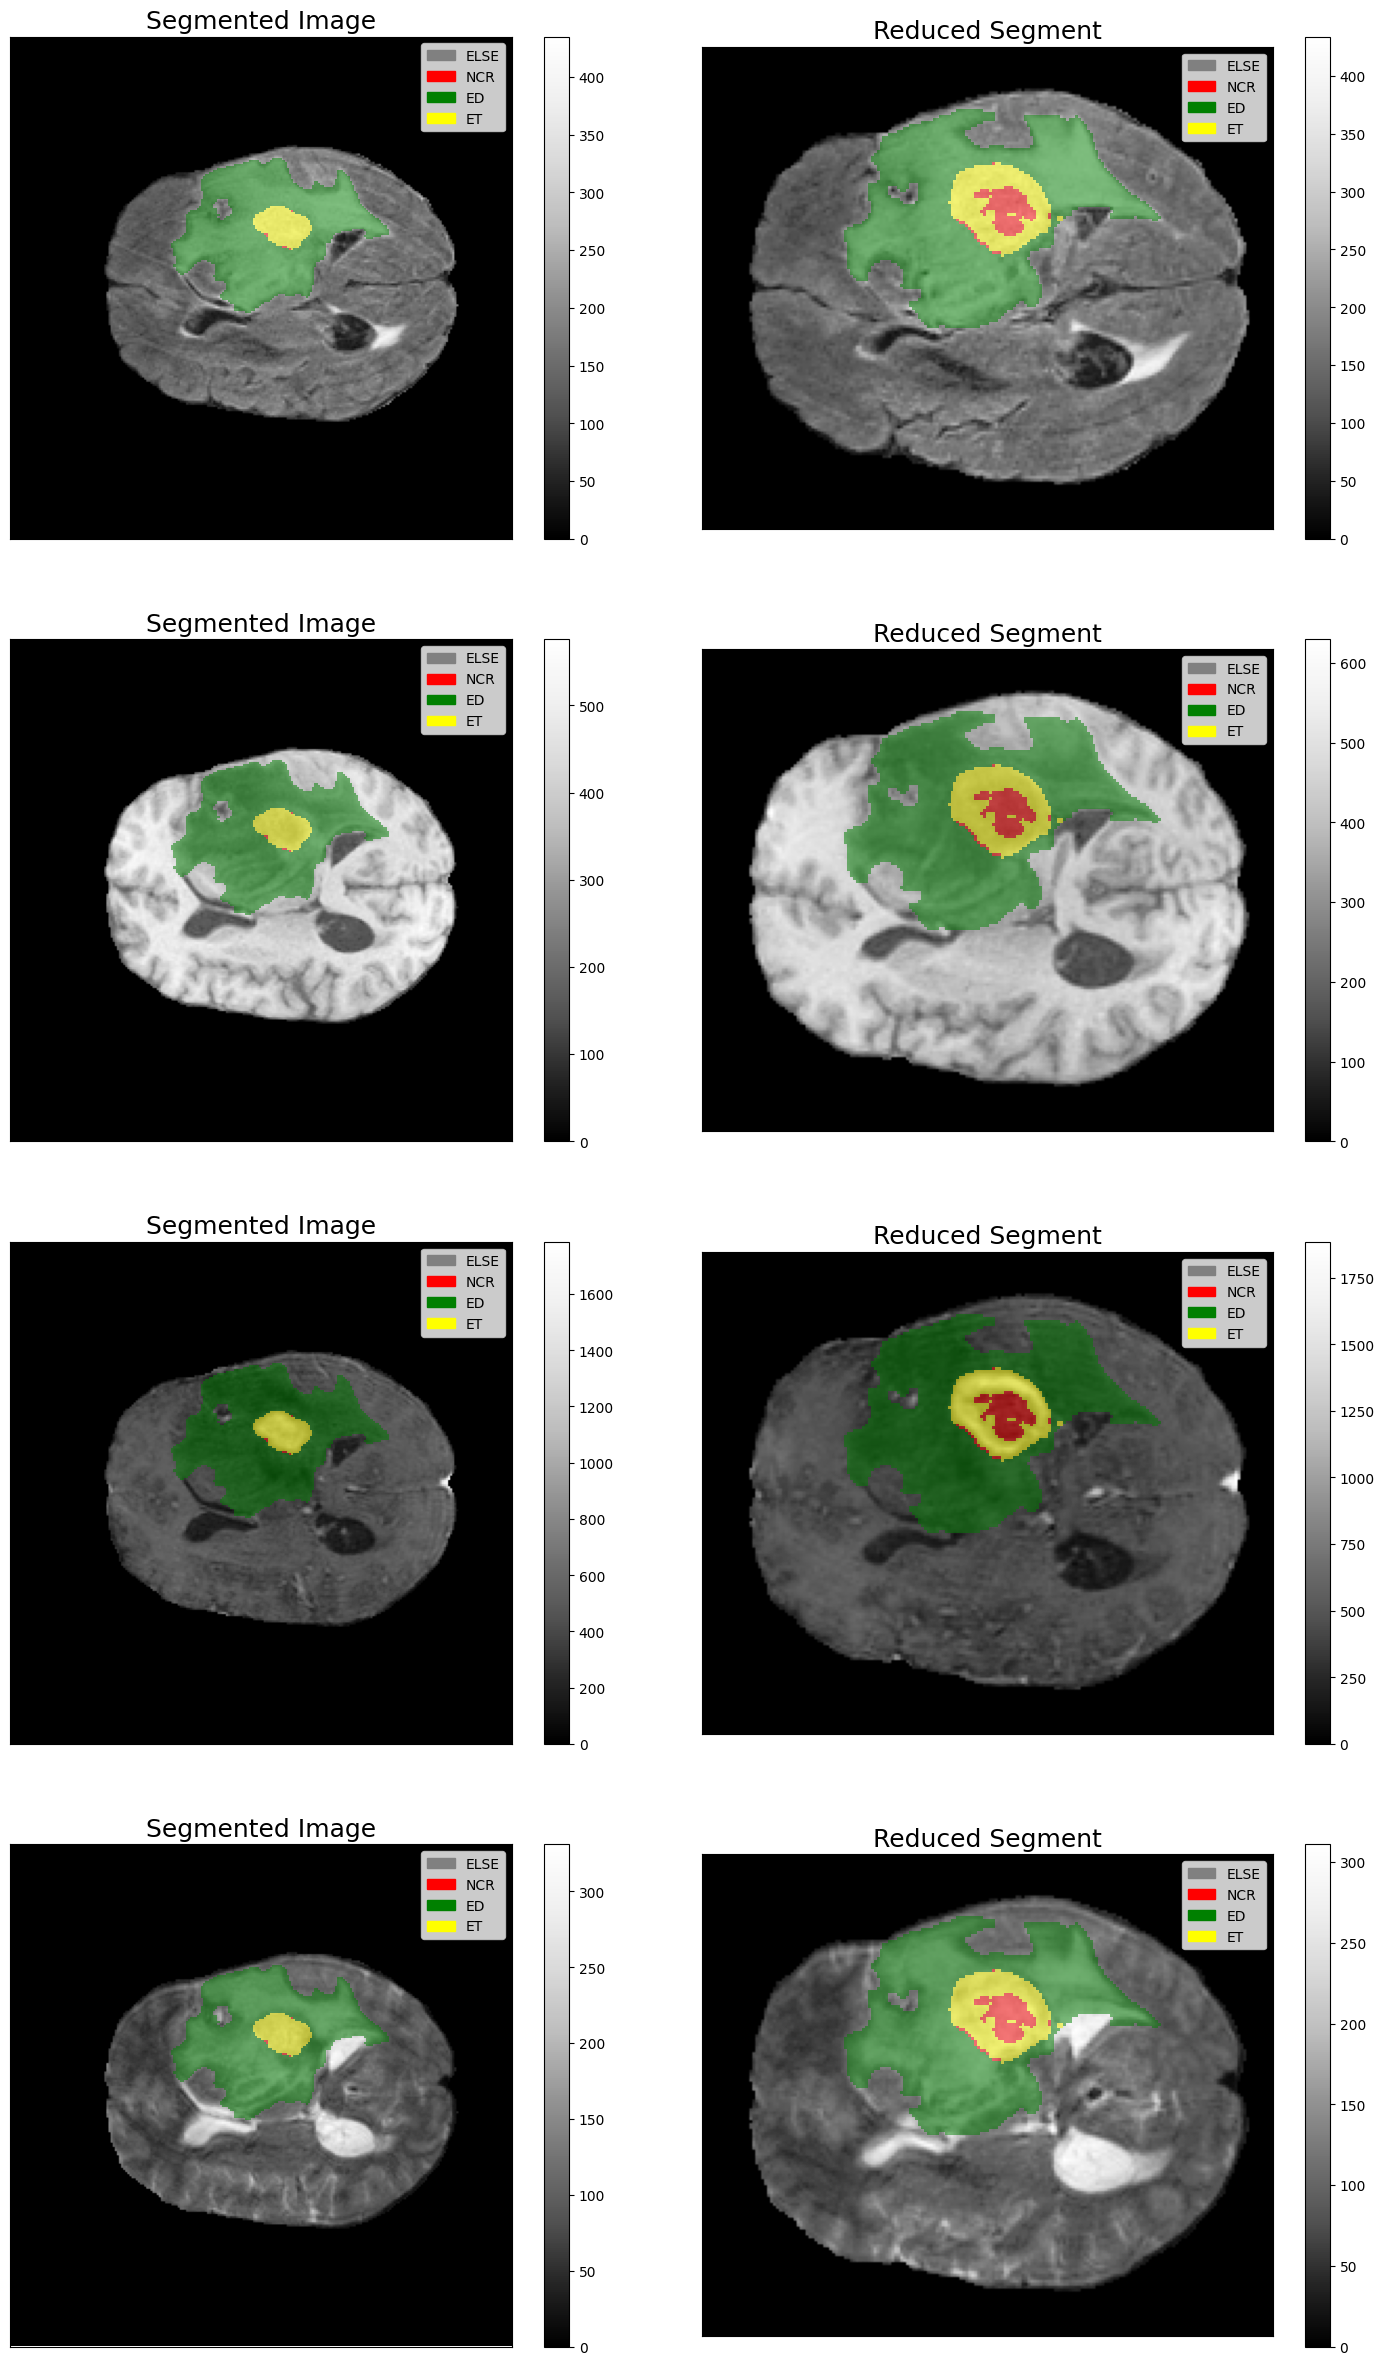

In [55]:
# extract the subject scan for the first manually-revised segmentation label e.g. UPENN-GBM-00002_11
subj_file = segm_files[0].split("_")[0]

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(18, 30))

# plot each structural scan image
for row, struct_scan in enumerate(StructuralScan):

    # load and plot structural images on the first column
    struct_img = data_handler.load_mri(subj_id=subj_file,
                                mri_type=MriType.STRUCT_SCAN,
                                struct_scan=struct_scan)

    mri_plt.plot_struct_img(img_data=struct_img, fig=fig, axs=axs, row=row, col=0, title=f"{subj_file} - {struct_scan}")

    # overlay segments on first column
    segm_img = data_handler.load_mri(subj_id=subj_file,
                                    mri_type=MriType.AUTO_SEGMENTED)
    mri_plt.plot_segm_img(img_data=segm_img, fig=fig, axs=axs, row=row, col=0,
                          overlay=True, use_legend=True, title="Segmented Image")

    # load and plot corresponding reduced images on the second column
    reduced_img = data_handler.load_mri(subj_id=subj_file,
                                mri_type=MriType.STRUCT_SCAN_REDUCED,
                                struct_scan=struct_scan)
    mri_plt.plot_struct_img(img_data=reduced_img, fig=fig, axs=axs, row=row, col=1, title="Reduced Version")


    # overlay reduced segments on second column
    reduced_segm_img = data_handler.load_mri(subj_id=subj_file,
                                mri_type=MriType.AUTO_SEGMENTED_REDUCED)
    mri_plt.plot_segm_img(img_data=reduced_segm_img, fig=fig, axs=axs, row=row, col=1,
                      overlay=True, use_legend=True, title="Reduced Segment")



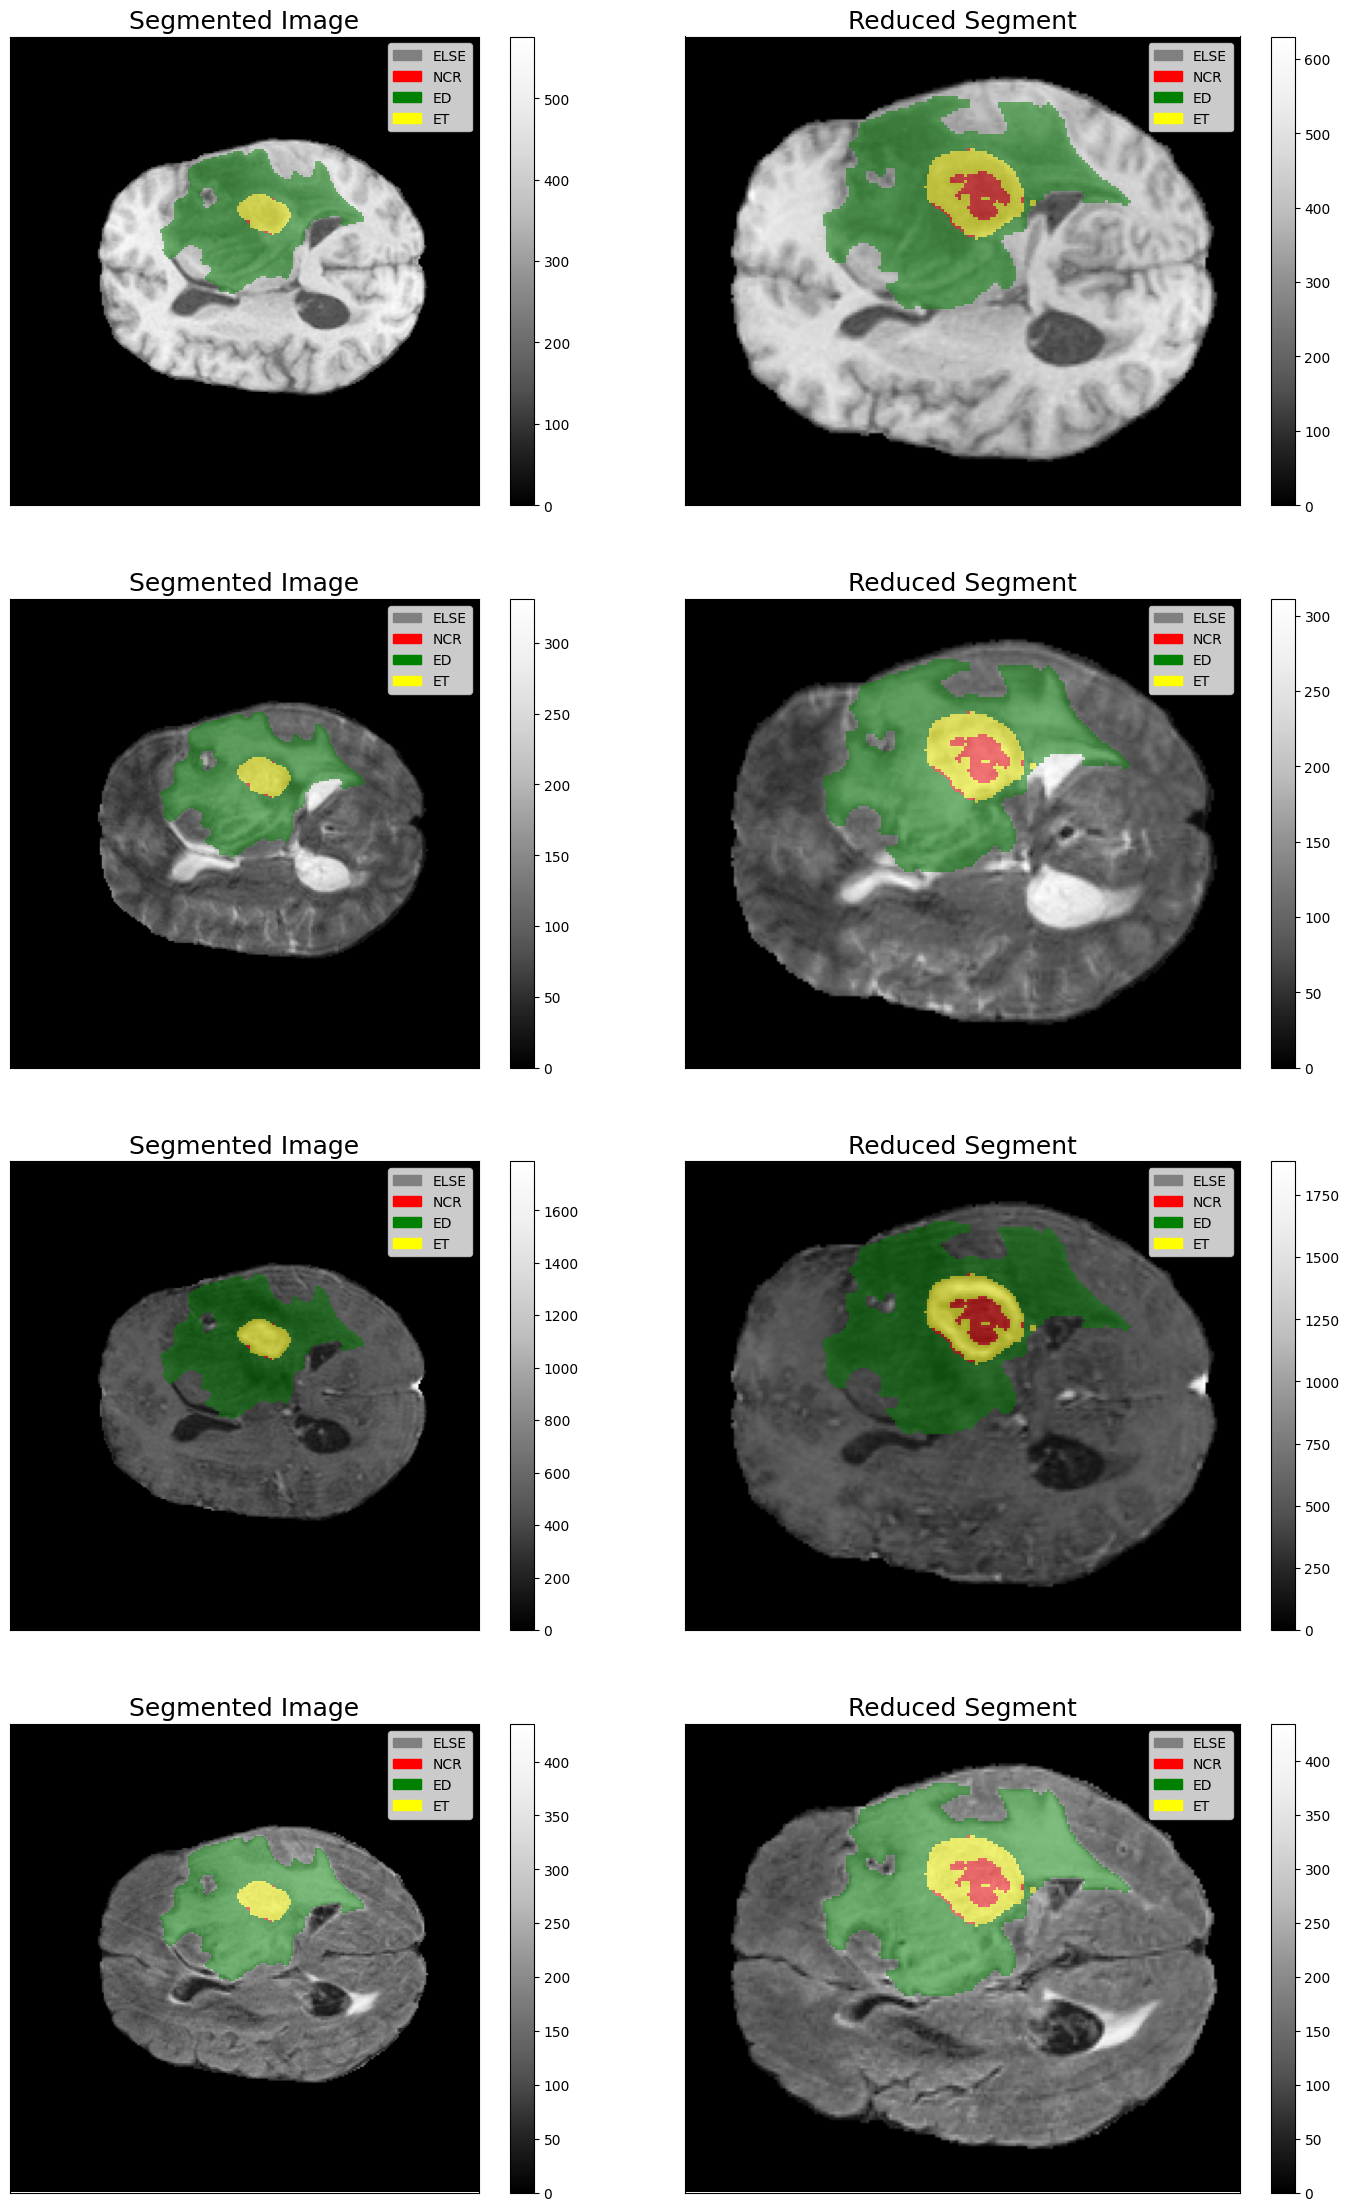

In [40]:
# plot image 2
subj_file = segm_files[0].split("_")[0]

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(18, 28))

# plot each structural scan image
for row, struct_scan in enumerate(StructuralScan):

    # load and plot structural images on the first column
    struct_img = data_handler.load_mri(subj_id=subj_file,
                                mri_type=MriType.STRUCT_SCAN,
                                struct_scan=struct_scan)

    mri_plt.plot_struct_img(img_data=struct_img, fig=fig, axs=axs, row=row, col=0, title=f"{subj_file} - {struct_scan}")

    # overlay segments on first column
    segm_img = data_handler.load_mri(subj_id=subj_file,
                                    mri_type=MriType.AUTO_SEGMENTED)
    mri_plt.plot_segm_img(img_data=segm_img, fig=fig, axs=axs, row=row, col=0,
                          overlay=True, use_legend=True, title="Segmented Image")

    # load and plot corresponding reduced images on the second column
    reduced_img = data_handler.load_mri(subj_id=subj_file,
                                mri_type=MriType.STRUCT_SCAN_REDUCED,
                                struct_scan=struct_scan)
    mri_plt.plot_struct_img(img_data=reduced_img, fig=fig, axs=axs, row=row, col=1, title="Reduced Version")


    # overlay reduced segments on second column
    reduced_segm_img = data_handler.load_mri(subj_id=subj_file,
                                mri_type=MriType.AUTO_SEGMENTED_REDUCED)
    mri_plt.plot_segm_img(img_data=reduced_segm_img, fig=fig, axs=axs, row=row, col=1,
                      overlay=True, use_legend=True, title="Reduced Segment")



### 3.d. Plot the first 5 annotated and auto labelled images side by side

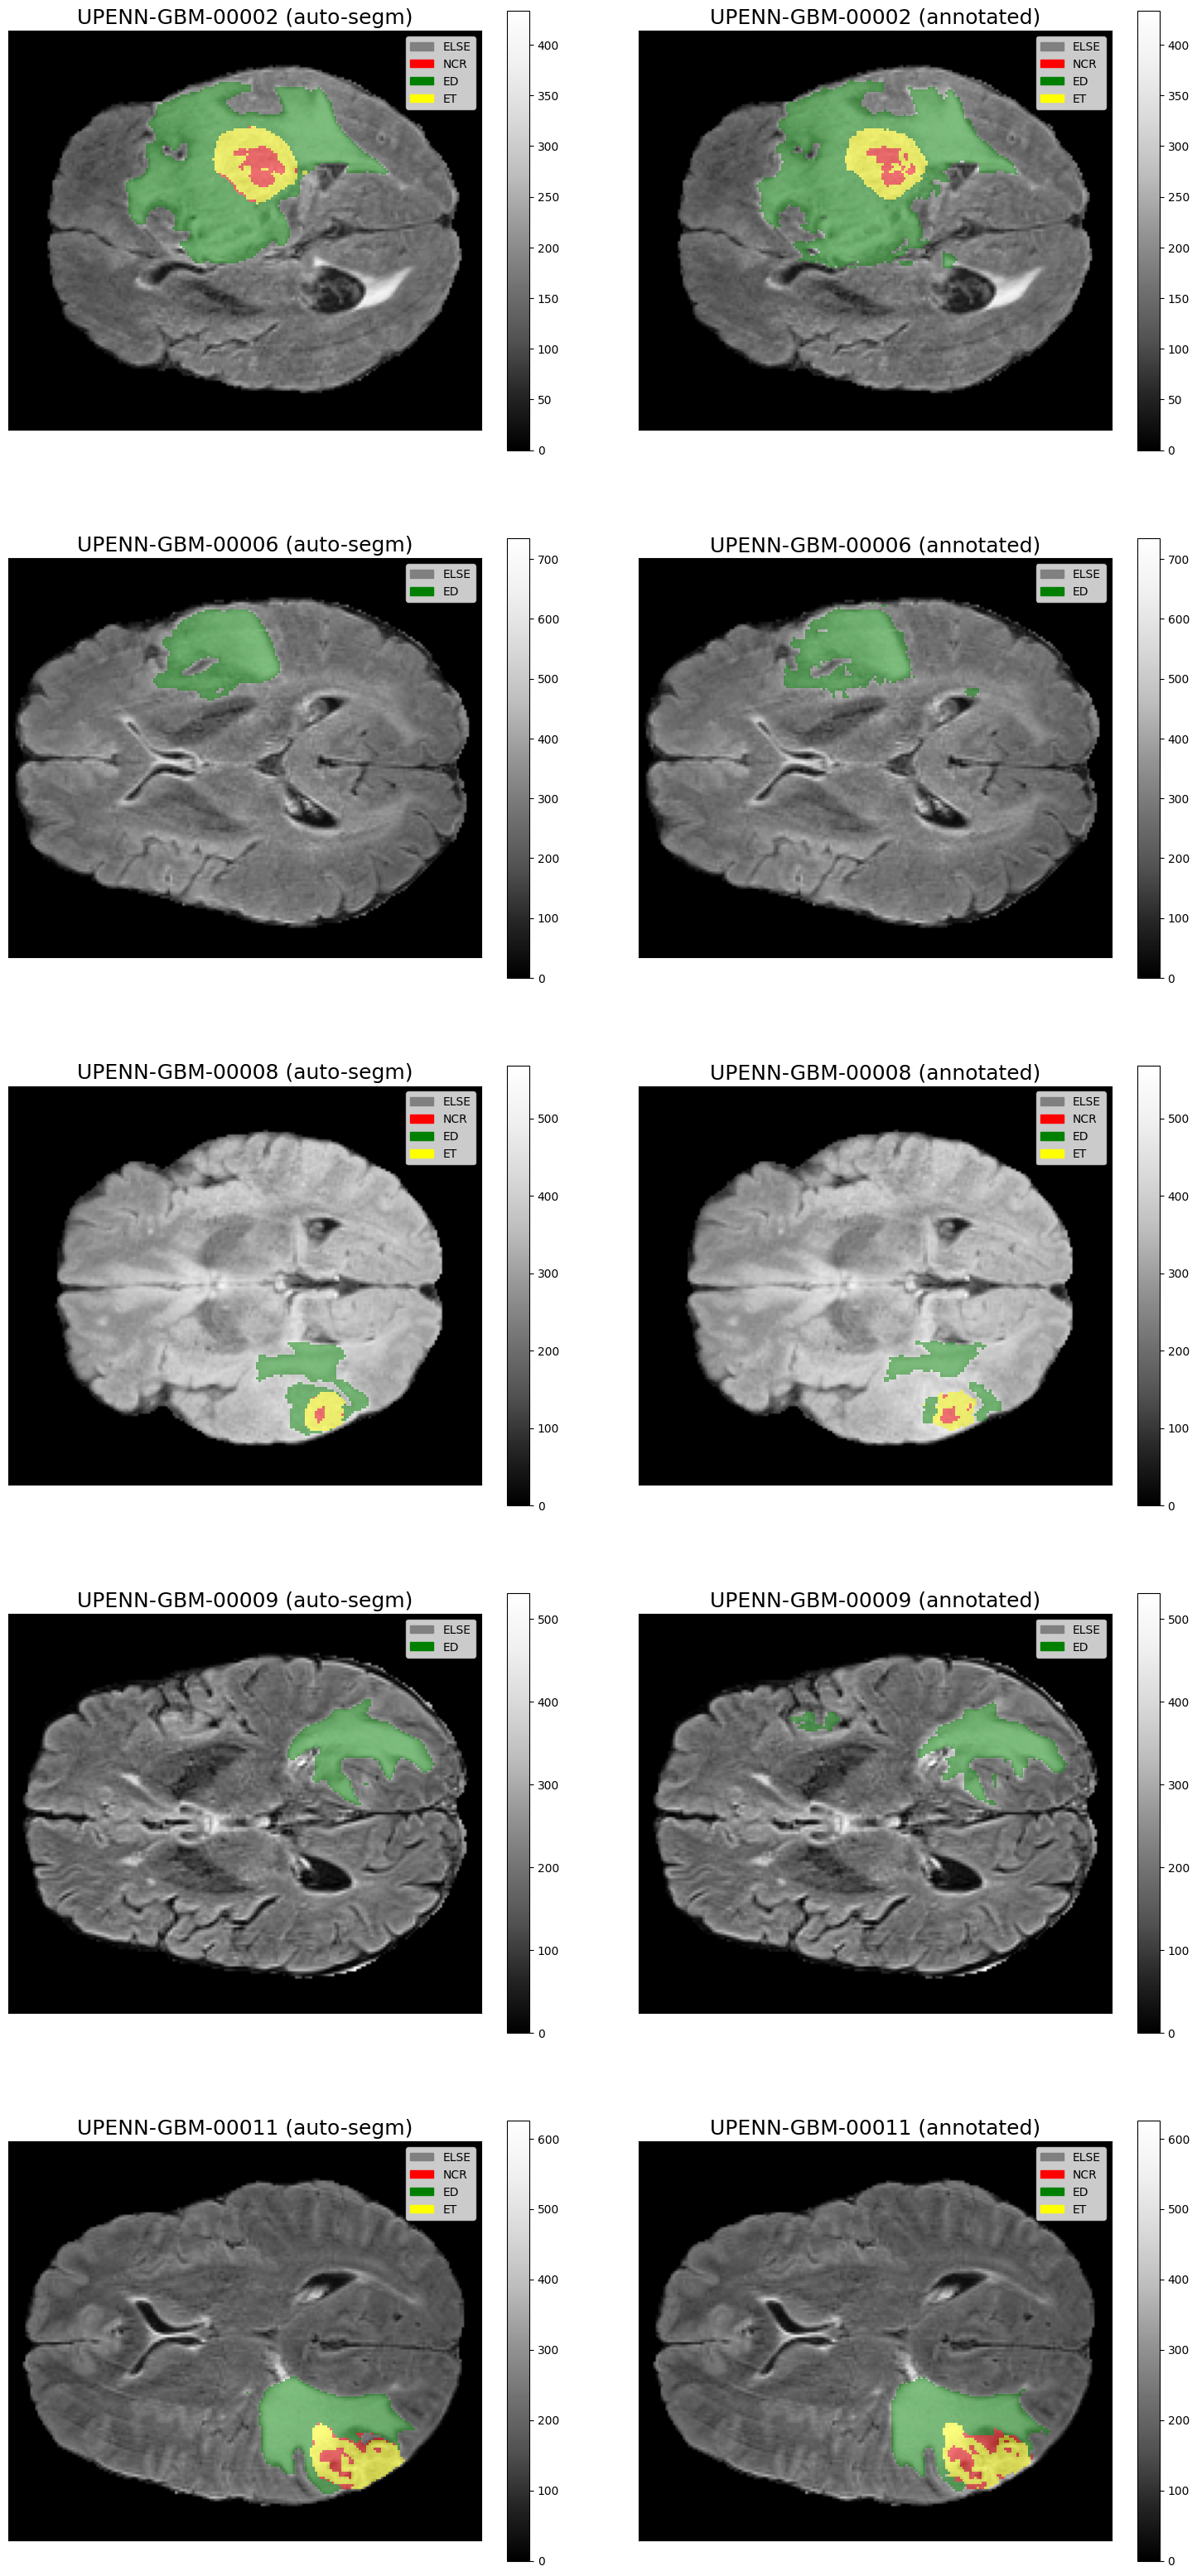

In [42]:
# load first 5 images
num_images = 5
fig, axs = plt.subplots(nrows=num_images, ncols=2, figsize=(18, 8*num_images))
for row in range(num_images):

    subj_file = segm_files[row].split("_")[0]

    # Plot the base image (reduced version) on both columns. Hardcode FLAIR as base image for now
    struct_reduced = data_handler.load_mri(subj_id=subj_file,
                            mri_type=MriType.STRUCT_SCAN_REDUCED,
                            struct_scan=StructuralScan.FLAIR)

    for col in range(2):
        mri_plt.plot_struct_img(img_data=struct_reduced, fig=fig, axs=axs, row=row, col=col)

    # plot auto labelled (reduced) on first column
    auto_segm = data_handler.load_mri(subj_id=subj_file, mri_type=MriType.AUTO_SEGMENTED_REDUCED)
    mri_plt.plot_segm_img(img_data=auto_segm, fig=fig, axs=axs, row=row, col=0, title=f"{subj_file} (auto-segm)",
                          overlay=True, use_legend=True)


    # plot manually annotated (reduced) on second column
    segm = data_handler.load_mri(subj_id=subj_file, mri_type=MriType.ANNOTATED_REDUCED)
    mri_plt.plot_segm_img(img_data=segm, fig=fig, axs=axs, row=row, col=1, title=f"{subj_file} (annotated)",
                          overlay=True, use_legend=True)

### 3.e Visualize multiple samples at location with largest tumor spread

Working on sample No. 0 display slide No. 68  with  4973 non-zero pixels in label.
Working on sample No. 1 display slide No. 68  with  4973 non-zero pixels in label.
Working on sample No. 2 display slide No. 68  with  4973 non-zero pixels in label.
Working on sample No. 3 display slide No. 68  with  4973 non-zero pixels in label.
Working on sample No. 4 display slide No. 68  with  4973 non-zero pixels in label.
Working on sample No. 5 display slide No. 68  with  4973 non-zero pixels in label.
Working on sample No. 6 display slide No. 68  with  4973 non-zero pixels in label.
Working on sample No. 7 display slide No. 68  with  4973 non-zero pixels in label.
Working on sample No. 8 display slide No. 68  with  4973 non-zero pixels in label.
Working on sample No. 9 display slide No. 68  with  4973 non-zero pixels in label.
Working on sample No. 10 display slide No. 68  with  4973 non-zero pixels in label.
Working on sample No. 11 display slide No. 68  with  4973 non-zero pixels in label.
Wo

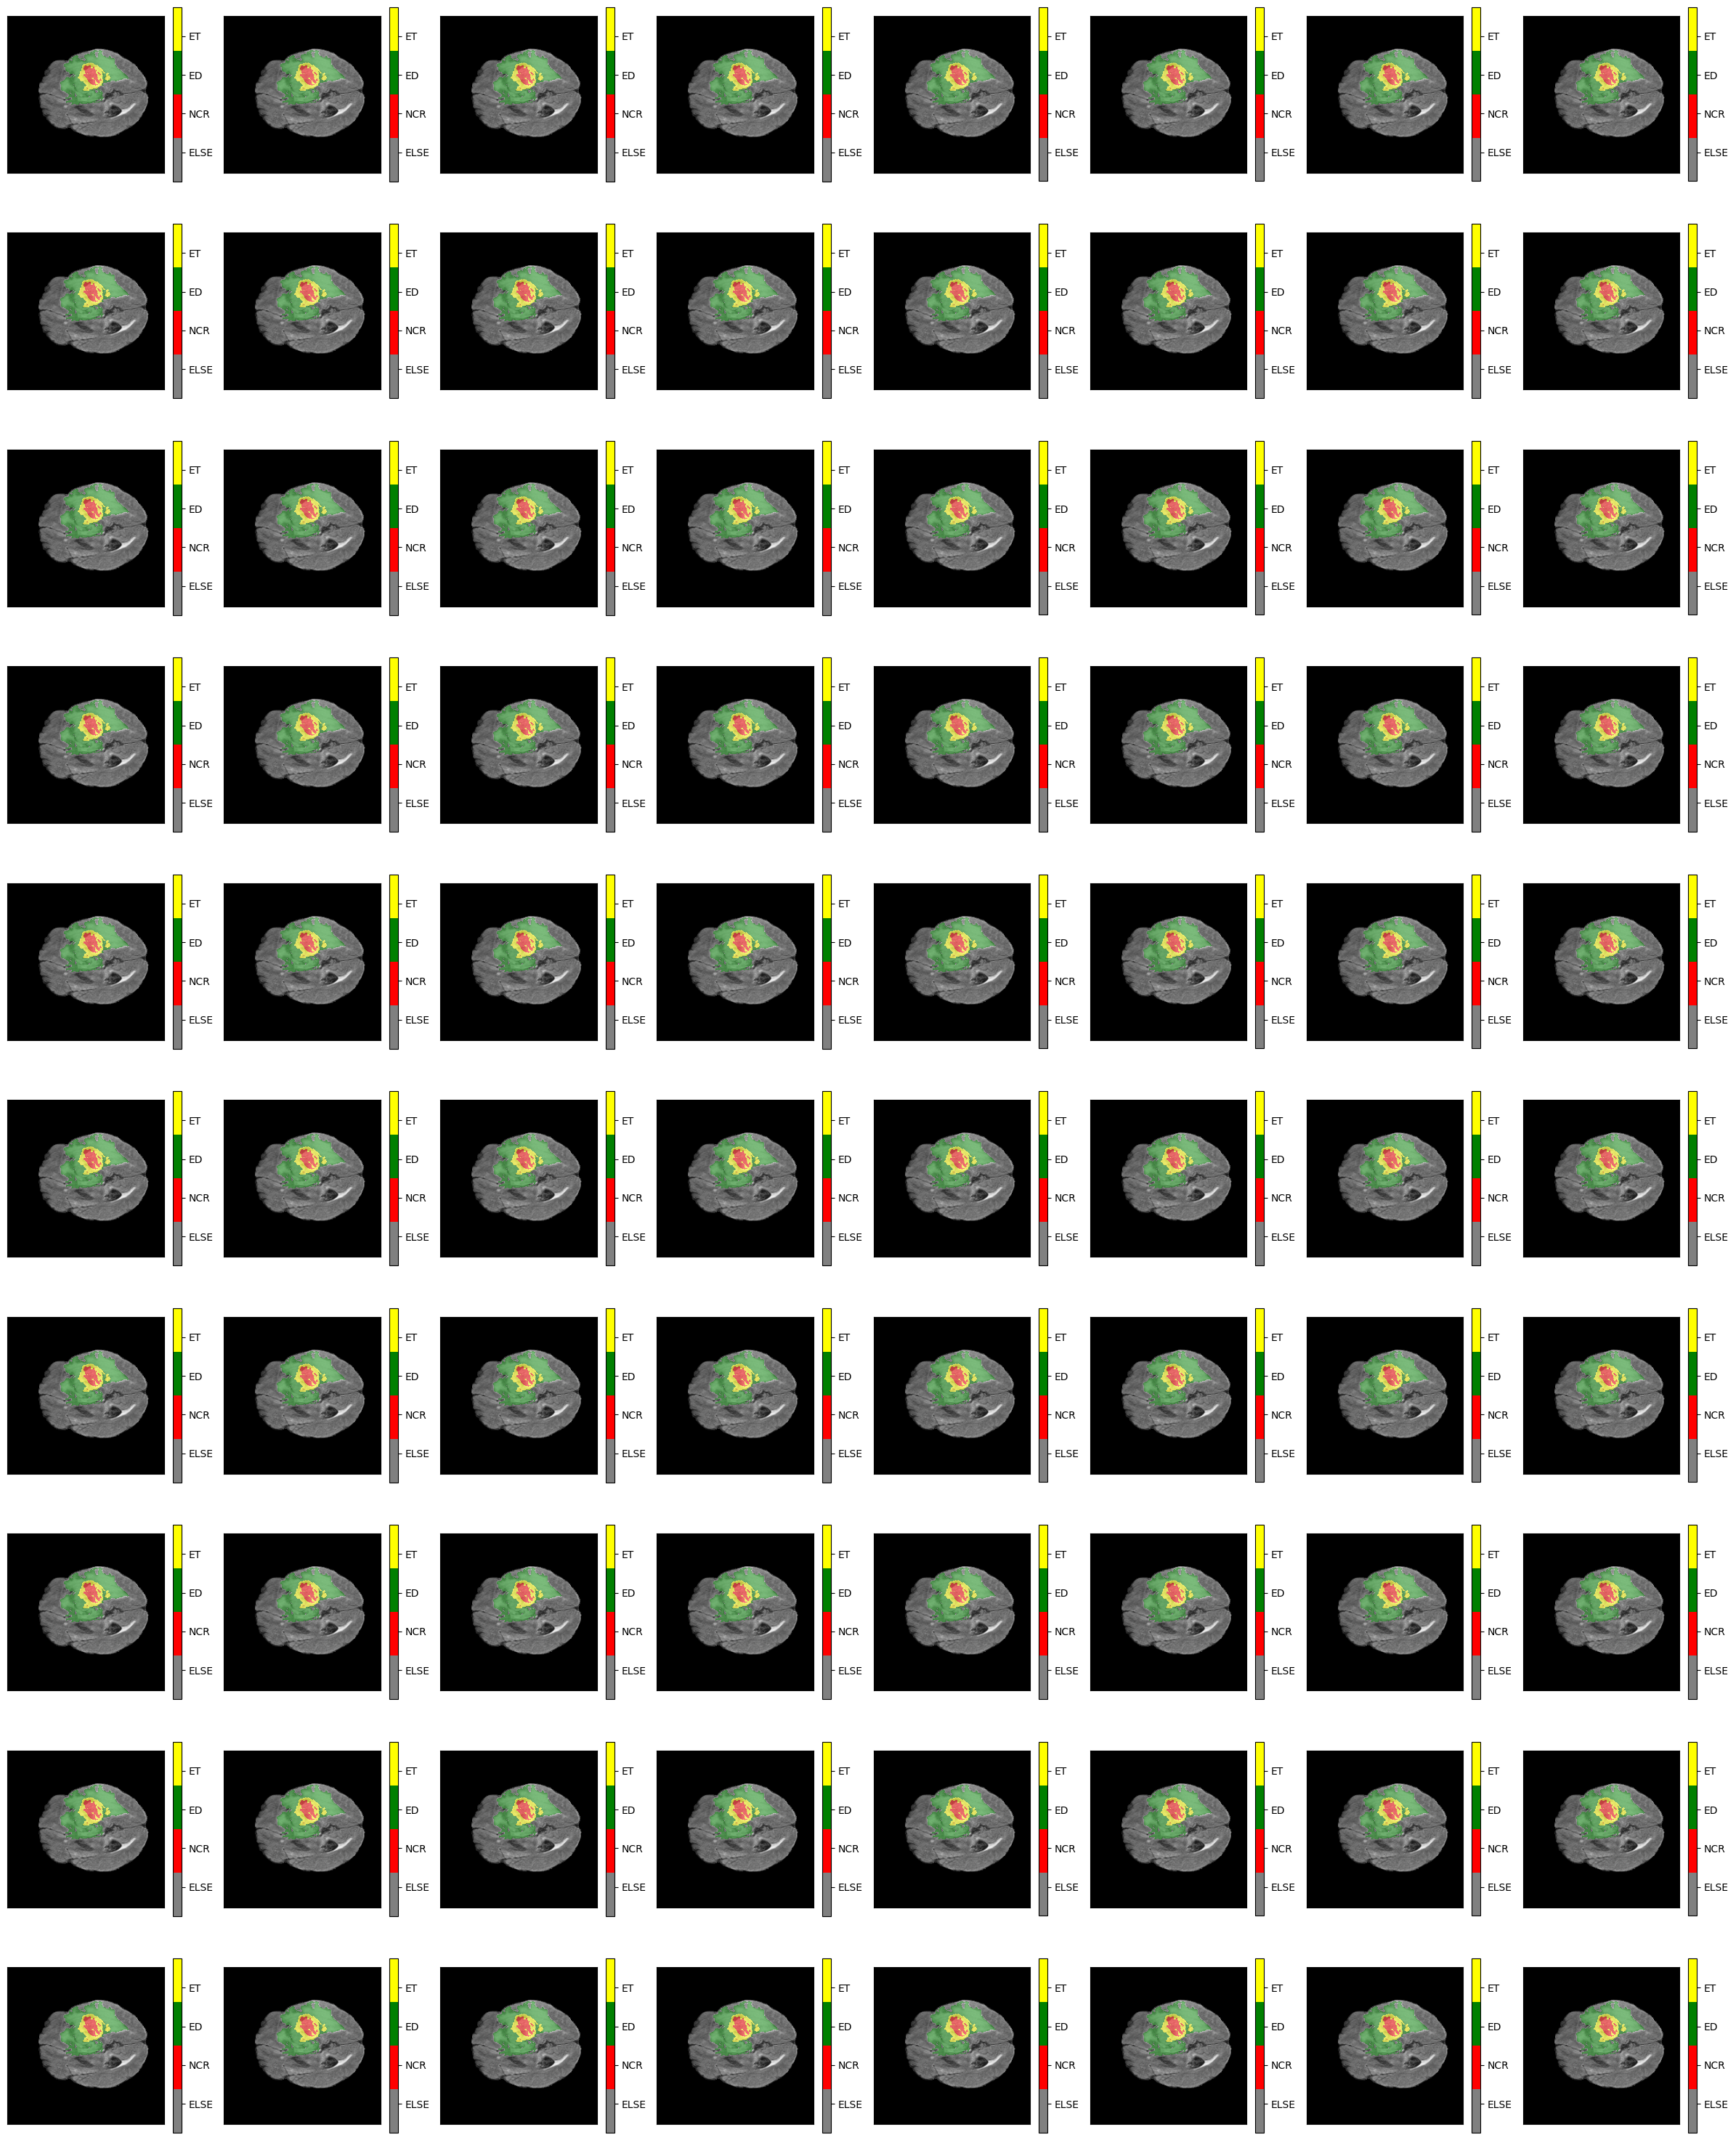

In [8]:
# visualize the structural images and its corresponding manually-revised segmentation label for starters
# set the number of plots per row and column
# Warning: needs high-RAM machine to run all (e.g. >80) plots
# nrows = 19
nrows = 10
ncols = 8

# set a constant color scale for all structure images
img_max = 1000
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(3*ncols,3*nrows))

# iteratively load the file structural images and display them
for idx in range(nrows*ncols):

    # go until no more samples
    if idx >= len(segm_files):
        break

    # determine which row/col to plot the current axs
    row = idx // ncols
    col = idx % ncols

    # extract the subject scan for the first manually-revised segmentation label
    subj_file = segm_files[0].split("_")[0]

    # load the images
    struct_img = data_handler.load_mri(subj_id=subj_file, mri_type=MriType.STRUCT_SCAN, struct_scan=StructuralScan.FLAIR)
    segm_img = data_handler.load_mri(subj_id=subj_file, mri_type=MriType.ANNOTATED)

    # calculate slice idx
    slice_idx, nonzero_count = mri_common.get_largest_tumor_slice_idx(segm_img)
    print("Working on sample No.", idx, "display slide No.", slice_idx, " with ",
          nonzero_count, "non-zero pixels in label.")

    # plot the base image (reduced version) on both columns. Hardcode FLAIR as base image for now
    mri_plt.plot_struct_img(img_data=struct_img, fig=fig, axs=axs, row=row, col=col, colorbar=False, slice_idx=slice_idx)

    # plot manually annotated (reduced) as overlay
    mri_plt.plot_segm_img(img_data=segm_img, fig=fig, axs=axs, row=row, col=col, overlay=True, segm_colorbar=True, slice_idx=slice_idx)

# show the figure
plt.tight_layout()
plt.show()
# fig.savefig('example_all_sample.pdf', format='pdf')

## 4. Checking affine matrix and headers

In [40]:
test_subj_id="UPENN-GBM-00002"
t1_img, t1_nifti = data_handler.load_mri(subj_id=test_subj_id, struct_scan=StructuralScan.T1, mri_type=MriType.STRUCT_SCAN_REDUCED, return_nifti=True)
t1gd_img, t1gd_nifti = data_handler.load_mri(subj_id=test_subj_id, struct_scan=StructuralScan.T1GD, mri_type=MriType.STRUCT_SCAN_REDUCED, return_nifti=True)
t2_img, t2_nifti = data_handler.load_mri(subj_id=test_subj_id, struct_scan=StructuralScan.T2, mri_type=MriType.STRUCT_SCAN_REDUCED, return_nifti=True)
flair_img, flair_nifti = data_handler.load_mri(subj_id=test_subj_id, struct_scan=StructuralScan.FLAIR, mri_type=MriType.STRUCT_SCAN_REDUCED, return_nifti=True)

In [41]:
# image type
print("Nifti Type", type(t1_nifti))
print("Array Type", type(t1_img))

Nifti Type <class 'nibabel.nifti1.Nifti1Image'>
Array Type <class 'numpy.ndarray'>


all four structural scans have the same affine transformation matrix &check;

In [44]:
# print affine
print("T1 affine")
print(t1_nifti.affine)
print("T1 GD affine")
print(t1gd_nifti.affine)
print("T2 affine")
print(t2_nifti.affine)
print("Flair affine")
print(flair_nifti.affine)

T1 affine
[[ -1.   0.   0.  -0.]
 [  0.  -1.   0. 239.]
 [  0.   0.   1.   0.]
 [  0.   0.   0.   1.]]
T1 GD affine
[[ -1.   0.   0.  -0.]
 [  0.  -1.   0. 239.]
 [  0.   0.   1.   0.]
 [  0.   0.   0.   1.]]
T2 affine
[[ -1.   0.   0.  -0.]
 [  0.  -1.   0. 239.]
 [  0.   0.   1.   0.]
 [  0.   0.   0.   1.]]
Flair affine
[[ -1.   0.   0.  -0.]
 [  0.  -1.   0. 239.]
 [  0.   0.   1.   0.]
 [  0.   0.   0.   1.]]


the headers are consistent across each structural scan &check;

In [45]:
t1_nifti.header == t1gd_nifti.header == t2_nifti.header == flair_nifti.header

True

## 5. PCA analysis on 4 input channels

In [11]:
# find unique patent IDs
patent_id = []
for file_cur in segm_reduced_files:
    patent_id.append( file_cur.split('_')[0])
patent_id_unique = list(set(patent_id))
patent_id_unique.sort()
print(len(patent_id_unique))

147


In [12]:
# find all files given a patent ID
patent_id = patent_id_unique[0]
files_id = [file_cur for file_cur in segm_reduced_files if patent_id in file_cur]
files_id.sort()
print(files_id)

['UPENN-GBM-00002_11_FLAIR_cut.nii.gz', 'UPENN-GBM-00002_11_T1GD_cut.nii.gz', 'UPENN-GBM-00002_11_T1_cut.nii.gz', 'UPENN-GBM-00002_11_T2_cut.nii.gz', 'UPENN-GBM-00002_11_segm_cut.nii.gz']


In [13]:
# load a test file to obtain dimensions
subj_file = files_id[0].split("_")[0]
img_data, nifti = data_handler.load_mri(subj_id=subj_file,
                                        mri_type=MriType.STRUCT_SCAN_REDUCED,
                                        struct_scan=StructuralScan.FLAIR,
                                        return_nifti=True)
n0 = nifti.shape[0]
n1 = nifti.shape[1]
n2 = nifti.shape[2]
image_4_exp = np.zeros( (n0,n1,4,n2) )
print( image_4_exp.shape )

(163, 193, 4, 146)


In [60]:
# using hardcoded scans instead of StructuralScan Enum to force this order of overlay
for idx, struct_scan in enumerate(["FLAIR", "T1GD", "T1", "T2"]):
    # obtain file name
    img_data, nifti = data_handler.load_mri(subj_id=subj_file, mri_type=MriType.STRUCT_SCAN_REDUCED,
                                        struct_scan=struct_scan,
                                        return_nifti=True)

    image_4_exp[:,:,idx,:] = nifti.get_fdata()[:, :, :]

i2 = n2//2
image_4_exp_slice = np.reshape( image_4_exp[:,:,:,i2], (n0,n1,4) )
print( image_4_exp_slice.shape )

(163, 193, 4)


In [61]:
c0_min = np.min(image_4_exp_slice[:,:,0])
c1_min = np.min(image_4_exp_slice[:,:,1])
c2_min = np.min(image_4_exp_slice[:,:,2])
c3_min = np.min(image_4_exp_slice[:,:,3])
c0_max = np.max(image_4_exp_slice[:,:,0])
c1_max = np.max(image_4_exp_slice[:,:,1])
c2_max = np.max(image_4_exp_slice[:,:,2])
c3_max = np.max(image_4_exp_slice[:,:,3])

print(c0_min,c0_max,c1_min,c1_max,c2_min,c2_max,c3_min,c3_max)

image_4_exp_slice[:,:,0] = image_4_exp_slice[:,:,0] / c0_max
image_4_exp_slice[:,:,1] = image_4_exp_slice[:,:,1] / c1_max
image_4_exp_slice[:,:,2] = image_4_exp_slice[:,:,2] / c2_max
image_4_exp_slice[:,:,3] = image_4_exp_slice[:,:,3] / c3_max

0.0 433.9989517573267 0.0 1885.0108152776957 0.0 630.0000303704292 0.0 311.00181575119495


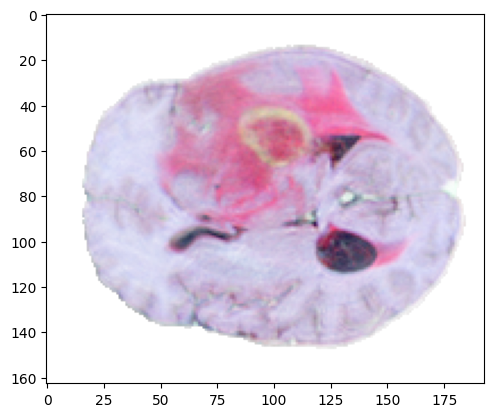

In [62]:
plt.imshow(image_4_exp_slice)
plt.show()

In [17]:
from sklearn.decomposition import PCA
import numpy as np

# Assume image is a 3D numpy array with shape (height, width, 4)
image = image_4_exp_slice

# Reshape the image to be a 2D array where each row is a pixel and each column is a channel
pixels = image.reshape(-1, 4)

# Perform PCA
pca = PCA(n_components=3)
transformed_pixels = pca.fit_transform(pixels)

# Reshape the transformed pixels back into the original image shape, but with 3 channels instead of 4
transformed_image = transformed_pixels.reshape(*image.shape[:2], 3)


In [18]:
# print eigen values
print(pca.explained_variance_)

[0.18579817 0.02857404 0.00650199]


In [19]:
# print weights in linear combinition
print(pca.components_)

[[ 0.63428797  0.47477169  0.25649434  0.5536075 ]
 [-0.68776259  0.56354601 -0.21463362  0.40414222]
 [ 0.09498855  0.67276651  0.09118946 -0.72804319]]


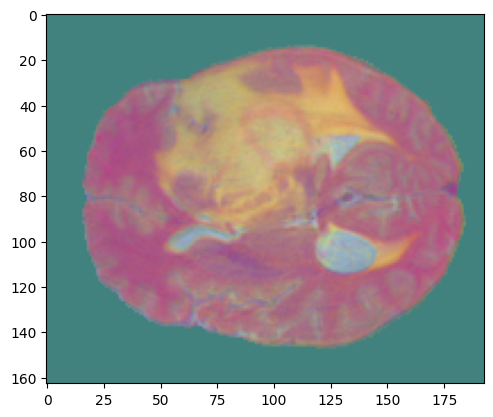

In [20]:
plt.imshow(transformed_image[:,:,:]/2+0.5)
plt.show()

In [22]:
pca_image = np.concatenate((transformed_image[:,:,0]/2+0.5, transformed_image[:,:,1]/2+0.5, transformed_image[:,:,2]/2+0.5), axis=1)
org_image = np.concatenate((image_4_exp_slice[:,:,0],image_4_exp_slice[:,:,1],image_4_exp_slice[:,:,2],image_4_exp_slice[:,:,3],), axis=1)

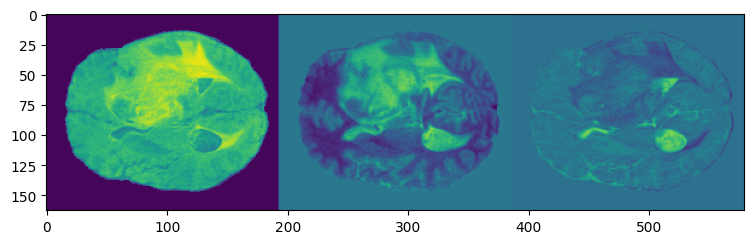

In [23]:
plt.figure(figsize=(9,3))
plt.imshow(pca_image)
plt.show()

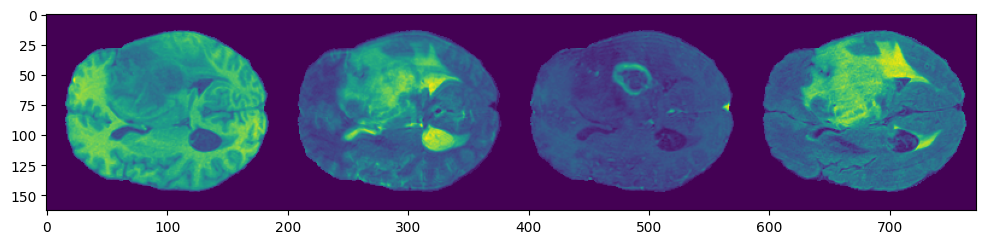

In [24]:
plt.figure(figsize=(12,3))
plt.imshow(org_image)
plt.show()

In [25]:
from sklearn.decomposition import PCA
import numpy as np

# Assume image is a 3D numpy array with shape (height, width, 4)
image = image_4_exp_slice[:,:,0:3].copy()
image[:,:,1] = image_4_exp_slice[:,:,3]

# Reshape the image to be a 2D array where each row is a pixel and each column is a channel
pixels = image.reshape(-1, 3)

# Perform PCA
pca = PCA(n_components=2)
transformed_pixels = pca.fit_transform(pixels)

# Reshape the transformed pixels back into the original image shape, but with 3 channels instead of 4
transformed_image = transformed_pixels.reshape(*image.shape[:2], 2)


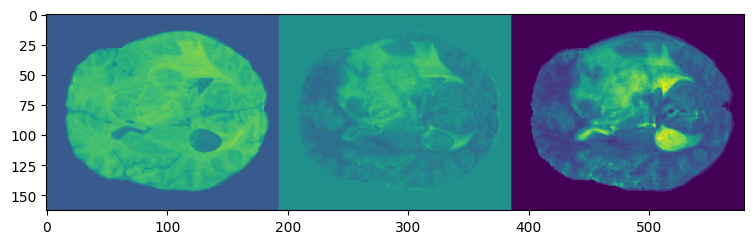

In [26]:
pca_image = np.concatenate((transformed_image[:,:,0]/2+0.5, transformed_image[:,:,1]/2+0.5, image_4_exp_slice[:,:,1]), axis=1)
plt.figure(figsize=(9,3))
plt.imshow(pca_image)
plt.show()